In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
round(data.describe().T , 2)

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.43,9.07,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.70,0.46,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.94,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.61,17.52,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.00,51.59,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.11,23.01,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.07,1.18,0.0,0.0,0.8,1.8,6.2



chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

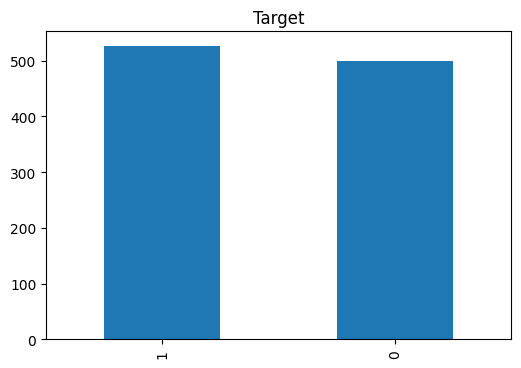

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target = data['target'].value_counts()
plt.figure(figsize=(6,4))
plt.title("Target")
target.plot.bar()
plt.show()

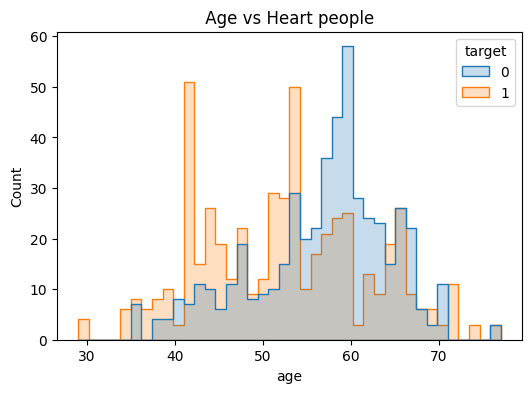

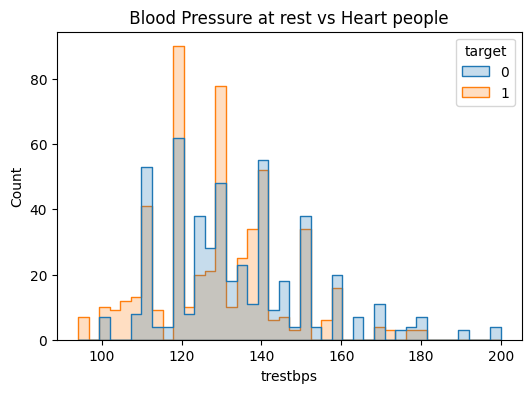

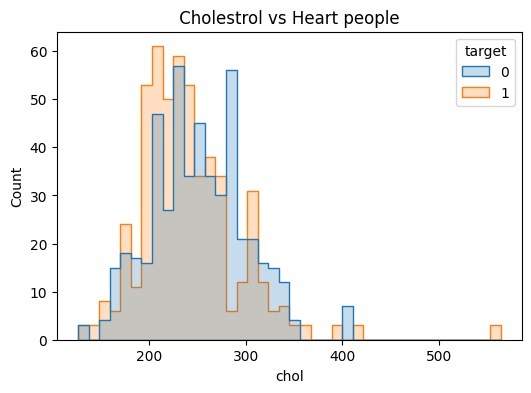

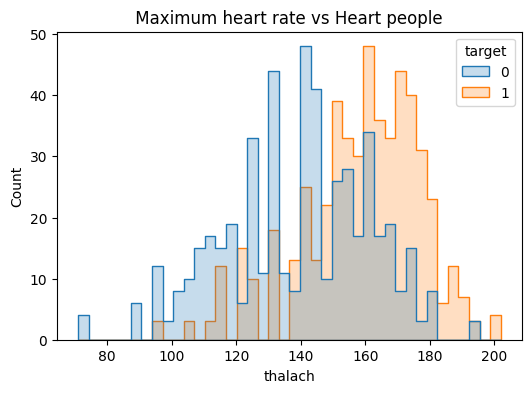

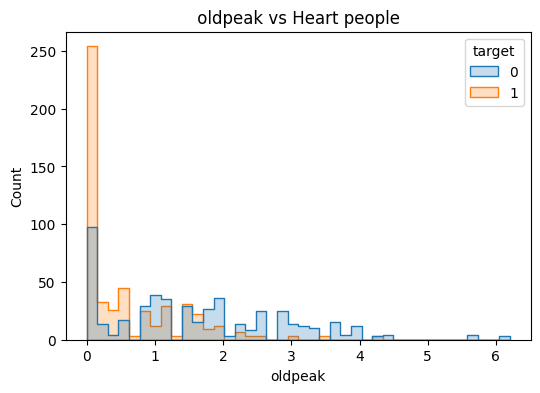

In [ ]:

dic={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in data[["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=data , bins=40  , hue="target",element="step")
    plt.title(f" {dic[col]} vs Heart people ")
    plt.show()

Text(0.5, 1.0, 'Correlation')

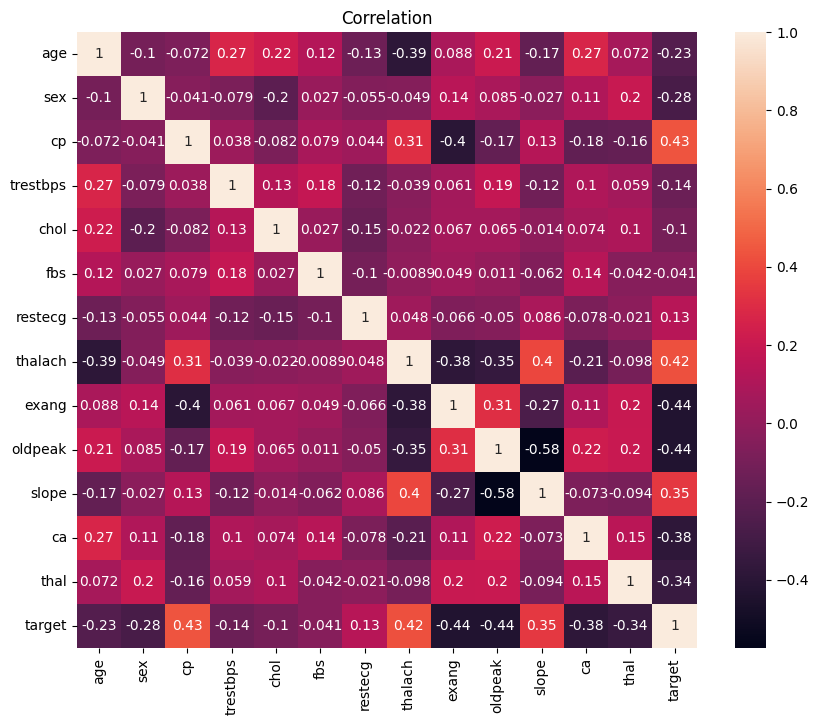

In [ ]:
plt.figure(figsize=(10 , 8))
sns.heatmap(data.corr() , annot=True)
plt.title("Correlation")

In [ ]:
from sklearn.model_selection import train_test_split

y = data["target"]
x = data.drop('target',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2022,test_size=0.2)
# # print(x_train)
# # print(x_test)
# # print(y_train)
# # print(y_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

----------config_matrix values----------
[[82 20]
 [ 4 99]]


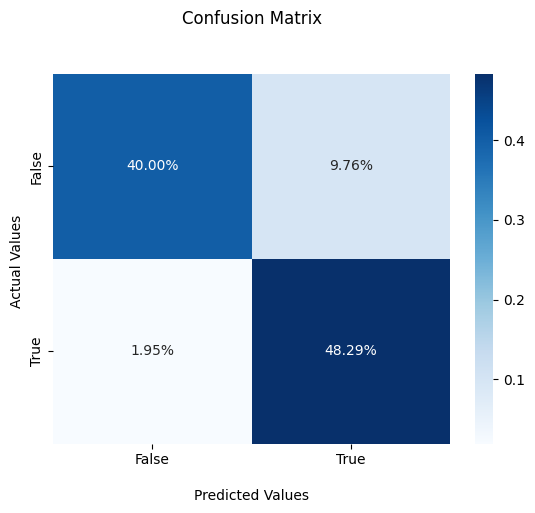

Precision macro: 0.893
Precision weighted: 0.892
Recall macro: 0.883
Recall weighted: 0.883
Accuracy macro: 0.883
F1 Score weighted: 0.882


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
config_matrix = confusion_matrix(y_test, rf_predicted )
print('----------config_matrix values----------')
print(config_matrix)
# plot_confusion_matrix(confusion_matrix)
import numpy as np
import seaborn as sns
ax = sns.heatmap(config_matrix/np.sum(config_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print('Precision macro: %.3f'  % precision_score(y_test, rf_predicted, average ='macro')) # tính precision macro
print('Precision weighted: %.3f'  % precision_score(y_test, rf_predicted, average ='weighted')) # tính precision weighted
print('Recall macro: %.3f' % recall_score(y_test, rf_predicted, average='macro')) # tính recall macro
print('Recall weighted: %.3f' % recall_score(y_test, rf_predicted, average='weighted')) # tính recall weighted
print('Accuracy macro: %.3f' % accuracy_score(y_test, rf_predicted)) # tính accuracy macro
print('F1 Score weighted: %.3f' % f1_score(y_test, rf_predicted, average='weighted')) # tính f1-score weighted